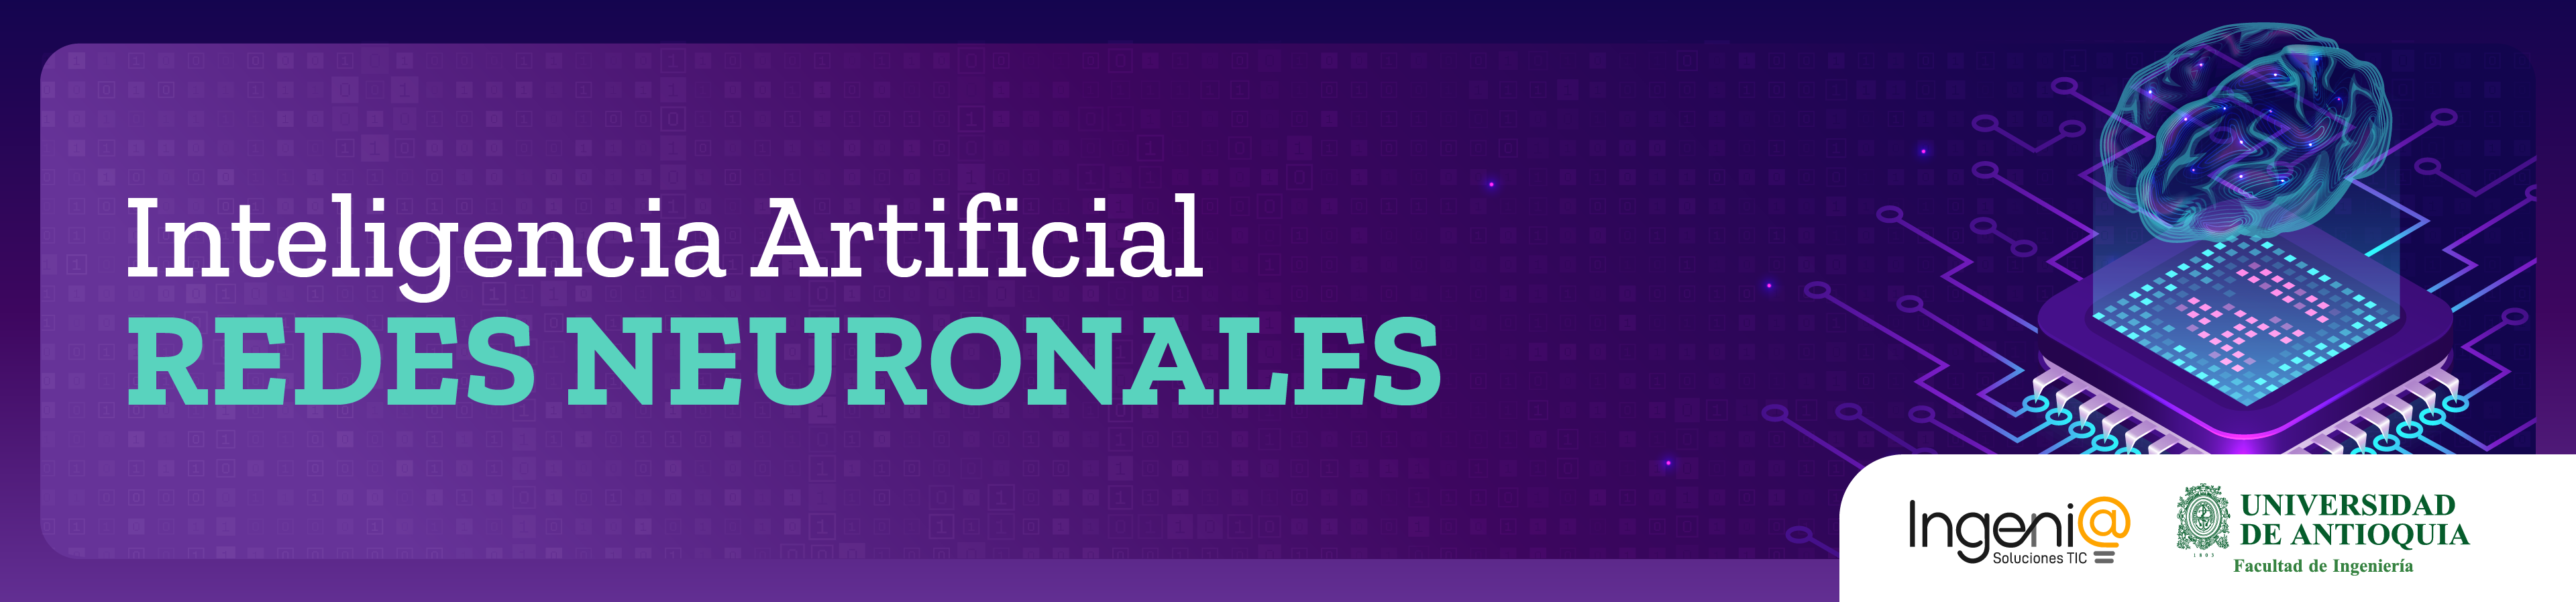

# Arquitectura de una Red Neuronal Artificial - MLP

# ¿Qué son las MLP desde la intuición?

### Problemas de clasificación usando doferentes tipos de datos.

### **Uso de datos tabulares.**
#### Son datos que están almacenados en archivos tipo Excel, CSV, JSON, etc. Son datos que se pueden representar en tablas donde las columnas son las características, las variables de entrada y las filas son las muestras, los registros.

## Ejemplo #1
Usaremos una base de datos de la librería Scikit-Learn.

Base de datos de [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.target[:3]
diabetes.data.shape

In [ ]:
print(diabetes.DESCR)

In [ ]:
import pandas as pd
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names
df.head()

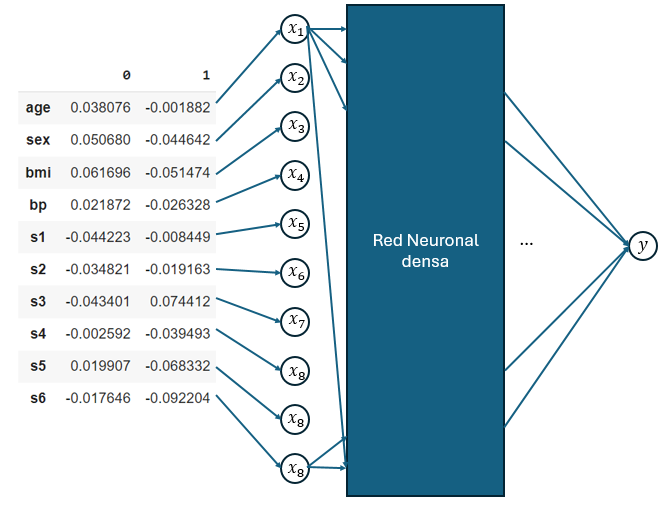

## Ejemplo #2

### Clasificación MNIST

Crear un modelo de clasificación para la base de datos <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits" target="_blank">MNIST dataset</a>, el cual es un conjunto de imágenes de número del 0 al 9 escritos a mano en escala de grises de 8x8.

Se cargan las librerías de interés para visualizar las imágenes y hacer operaciones matriciales con estas.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [ ]:
digits.data[0]

In [ ]:
digits.target

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# flatten de laas imágenes
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en subconjuntos de 50% para entrenamiento (train) y 50% para prueba (test)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Existe una librería de IA que se llama __Tensorflow__ que sirve para crear y entrenar redes neuronales artificiales, creadapor Google. <a href="https://www.tensorflow.org/" targer="_blank">Link</a>

In [ ]:
import tensorflow as tf

Pero... ¿Cómo ingresa esta imagen a la red neuronal artificial?

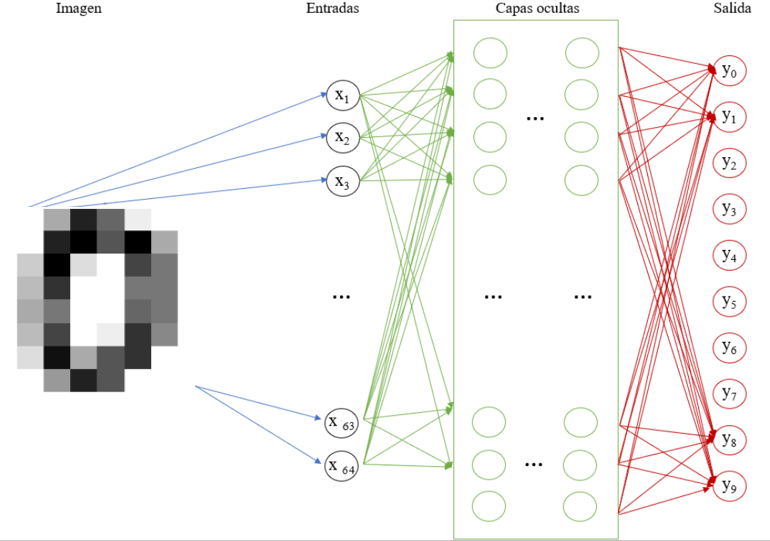

La imagen es una matriz de 8x8 y como vemos en la imagen anterior, cada pixel equivale a una entrada, por lo tanto hay que convertir la matriz de 8x8 en un vector de 64x1 y para esto usamos el método _reshape_

Pero... ¿Cuál es la diferencia entre una imagen original y una redimensionada?

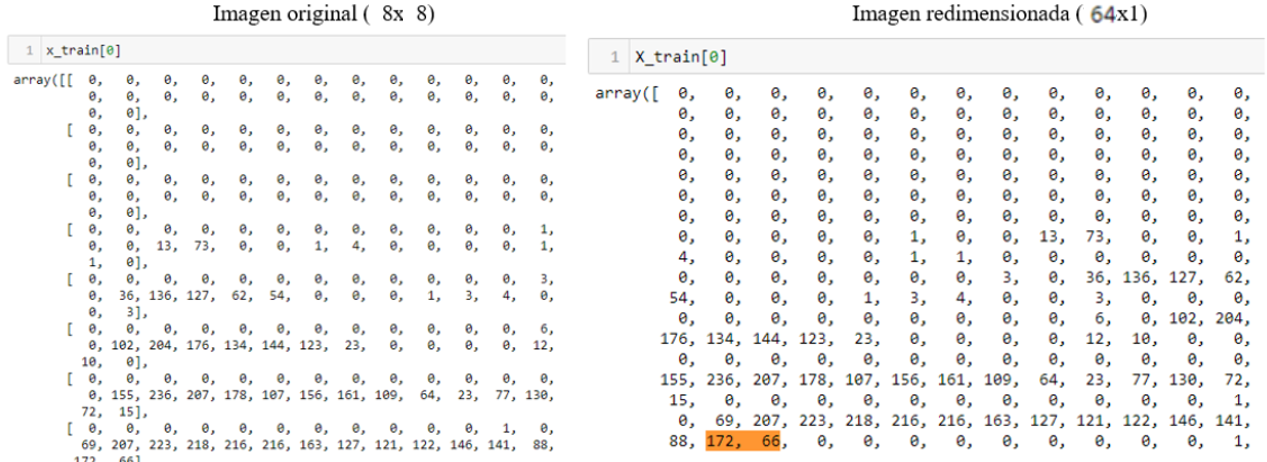

Luego de haber separado el conjunto de datos en _train_ y _test_, tenemos los siguientes tamaños de subset

In [ ]:
print('Tamaño del X_train: ', X_train.shape)
print('Tamaño del y_train: ', y_train.shape)
print('Tamaño del X_test: ', X_test.shape)
print('Tamaño del y_test: ', y_test.shape)

__Estandarización de los datos de entrada__<br>
_La estandarización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático: es posible que se comporten mal si las características individuales no se parecen más o menos a los datos estándar distribuidos normalmente (p. ej., gaussiana con media 0 y varianza unitaria)._<br>


## $z\ =\frac {(x\ -\ u)} {s}$

$x$ : la muestra.<br>
$u$ : la media de todas las muestras.<br>
$s$ : la desviación estándar de todas las muestras.<br>


Para este propósito, scikit-learn tiene implementado el método __StandardScaler()__


Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Se hace la importación de la librería y/o el método a utilizar

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

Ver los métodos:<br>
_fit_transform()_ <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform" target="_blank">Link</a><br>
_transform()_ <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform" target="_blank">Link</a>

Para tener los datos de salida, se hace la transformación del vector de salida. Se usa el método __np_utils.to_categorical()__ de keras, el cual convierte un vector de clase (enteros) en una matriz de clase binaria.

In [ ]:
import tensorflow as tf
from keras.utils import to_categorical
y_trainOHE = to_categorical([0,1,2,3,4,5,6,7,8,9])
for i , ohe in enumerate(y_trainOHE):
    print(i , '=>' ,ohe)

Se hace la codificación

In [ ]:
y_trainOHE = to_categorical(y_train)
y_testOHE = to_categorical(y_test)
nb_classes = y_trainOHE.shape[1]

In [ ]:
print('Número de clases:', nb_classes)

In [ ]:
print('Ejemplo de la salida de la muestra 0 del conjunto de train: ', y_trainOHE[0])

Información de la matriz de entrada a la red neuronal artificial

In [ ]:
input_dim = X_train.shape[1]

print("Tamaño de las imágenes (8x8) según la descripción del dataset: ",8*8)
print("La dimensión de la entrada (x) a la red: ", input_dim)

## Definir la arquitectura de la Red Neuronal Artificial - MLP

Ya que se tienen las matrices de entrada y salida, tanto para entrenamiento (_train_) como para prueba (_test_), se procede a definir la arquitectura de la red, entrenar y validar.

Hay varia formas de usar el método para la creación de una Red Neuronal Artificial en Python. Para efectos de este ejercicio vamos a crear dos redes sencillas para ejemplificar ambos métodos.

### Método #1

Se hace la importación de los métodos implementados en Scikit-Learn para la creación de una Red Neuronal Artificial

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Vamos a crear una red densa (_fully connected_) con __una capa interna de 32 neuronas__, donde la entrada será la imagen redimensionada anteriormente (__784,1__) y la __salida serán las 10 neuronas__ que contendrán la codificación __np_utils.to_categorical()__ realizada en los pasos anteriores

In [ ]:
model1 = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(nb_classes),
    Activation('softmax'),
])

In [ ]:
model1.summary()

### Método #2

Se importan las librerías a usar

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Para este segundo caso, crearemos una red densa (_fully connected_) con __dos capas interna de 64 y 32 neuronas__, donde la entrada será la imagen redimensionada anteriormente (__784,1__) y la __salida serán las 10 neuronas__ que contendrán la codificación __np_utils.to_categorical()__ realizada en los pasos anteriores

In [ ]:
model2 = Sequential()
model2.add(Dense(64, input_dim=input_dim , name='Hidden_Layer_1'))
model2.add(Activation('tanh' , name='tanh_1'))
model2.add(Dense(32 , name='Hidden_Layer_2'))
model2.add(Activation('tanh' , name='tanh_2'))
model2.add(Dense(nb_classes, activation='softmax' , name='Output_Layer'))

In [ ]:
model2.summary()

Un concepto para revisar en este punto, son las __Funciones de activación__

https://keras.io/api/layers/activations/

Una vez la arquitectura del modelo sea definida, el siguiente paso es configurar la función de pérdida y el optimizador

<a href="https://keras.io/api/optimizers/" target="_blank">Keras optimizers</a>
<br><br>
<a href="https://keras.io/api/losses/" target="_blank">Loss functions</a>

### Entrenamiento del modelo 1

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='sgd')

In [ ]:
print("Entrenando...")
model1.fit(X_trainN, y_trainOHE, epochs=1, batch_size=16, validation_split=0.1, verbose=2)

In [ ]:
print("Haciendo predicciones...")
preds = model1.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
objects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
objects.reverse()
y_pos = np.arange(nb_classes)

plt.barh(y_pos[::-1], performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Probabilidad')
plt.title('Salidas de la red')
plt.show()

In [ ]:
y_testOHE[0]

In [ ]:
X_testN[0]

In [ ]:
fig, ax = plt.subplots()
ax.imshow(X_testN[0].reshape(8,8), cmap='gray')
ax.set_title(y_train[0])
plt.show()

Visualizando el vector de salida

In [ ]:
preds[0]

Visualizando el vector de salida en porcetaje

In [ ]:
preds[0]*100

In [ ]:
preds = model1.predict(X_testN, verbose=0)
classes_x=np.argmax(preds,axis=1)
classes_x[:5]

### Entrenamiento del modelo 2

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd')
print("Entrenando el modelo 2...")
model2.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

In [ ]:
print("Haciendo predicciones...")
preds = model2.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
objects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
objects.reverse()
y_pos = np.arange(nb_classes)

plt.barh(y_pos[::-1], performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Probabilidad')
plt.title('Salidas de la red')
plt.show()

Visualizando el vector de salida en porcetaje

In [ ]:
preds[0]*100